https://bit.ly/FEML-3-GD

## Градиентный спуск

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

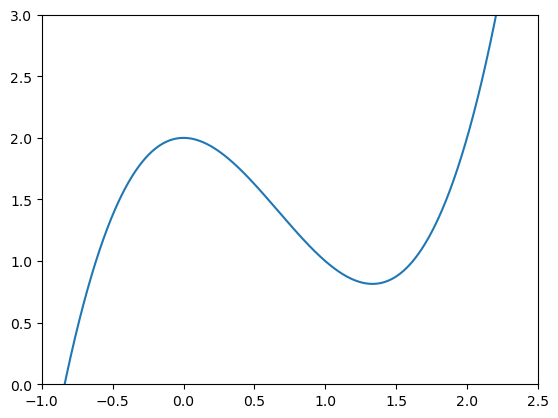

In [3]:
f = lambda x: x**3 - 2 * x**2 + 2
x = np.linspace(-1, 2.5, 1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

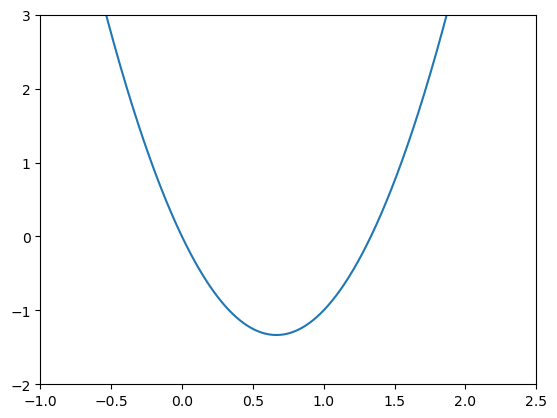

In [4]:
f_prime = lambda x: 3 * x**2 - 4 * x
x = np.linspace(-1, 2.5, 1000)
plt.plot(x, f_prime(x))
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Метод градиентного спуска

In [5]:
lr = 0.1
points = [2]
n_epochs = 15

In [6]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [7]:
y_points = [f(p) for p in points]

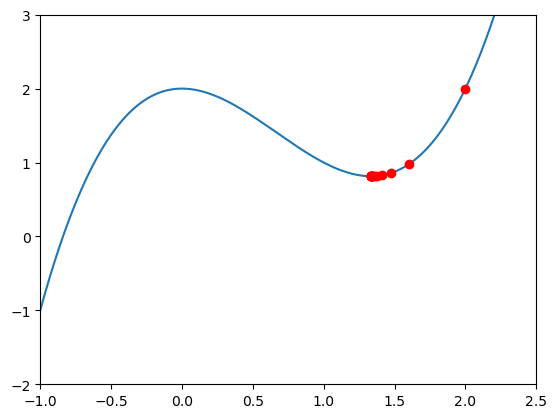

In [8]:
plt.plot(x,f(x))
plt.plot(points, y_points, 'ro')
plt.xlim([-1,2.5])
plt.ylim([-2,3])
plt.show()

## Практический пример

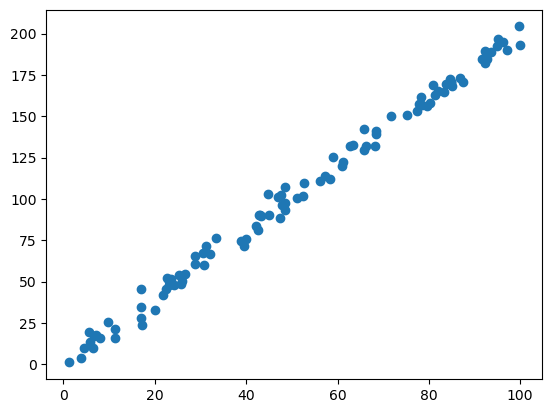

In [9]:
N = 100
X = np.random.uniform(low=0, high=100, size=N)
Y = 2*X + 1 + np.random.normal(scale=5, size=N)

plt.scatter(X, Y)
plt.show()

## Применим метод градиентного спуска

In [10]:
EPOCHS = 20
LEARNING_RATE = 0.0001

In [11]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += (pred - y[i]) ** 2
    return total_cost / len(X)

$$Loss = (θ_0 + θ_1 * x - y)^2 $$

$$\frac{dLoss}{dθ_0} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot 1 $$


$$\frac{dLoss}{dθ_1} = 2 \cdot (θ_0 + θ_1 * x - y) \cdot x $$

In [12]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i])
    return total_cost / len(X)    

In [13]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        pred = theta0 + theta1 * X[i]
        total_cost += 2 * (pred - y[i]) * X[i]
    return total_cost / (len(X))  

In [14]:
theta0 = 1
theta1 = 1

for _ in range(EPOCHS):
    dt0 = der_theta0(X, Y, theta0, theta1)
    dt1 = der_theta1(X, Y, theta0, theta1)
    
    theta0 -= LEARNING_RATE * dt0
    theta1 -= LEARNING_RATE * dt1
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X, Y, theta0, theta1))

t0: 1.01014744170413 t1: 1.6792184563520423 cost: 373.79418481958777
t0: 1.0134210928336094 t1: 1.8979399595345767 cost: 57.502255293656646
t0: 1.0144812490188595 t1: 1.9683724609274171 cost: 24.7038686537003
t0: 1.0148286163608669 t1: 1.9910530110878557 cost: 21.30278799608787
t0: 1.0149464514983049 t1: 1.9983565014627265 cost: 20.95010692542636
t0: 1.0149903724956857 t1: 2.0007082786320636 cost: 20.913534414137672
t0: 1.0150104914054243 t1: 2.001465507560955 cost: 20.909741274005864
t0: 1.015022945285944 t1: 2.00170926085608 cost: 20.909347242063077
t0: 1.0150329305848558 t1: 2.001787664985177 cost: 20.909305686024354
t0: 1.015042120659671 t1: 2.00181282346173 cost: 20.909300680593592
t0: 1.0150510543641649 t1: 2.0018208358038736 cost: 20.90929946540345
t0: 1.0150599052197788 t1: 2.0018233267606376 cost: 20.90929864331643
t0: 1.0150687291038163 t1: 2.001824039727972 cost: 20.90929786206105
t0: 1.015077544009873 t1: 2.0018241801523953 cost: 20.909297085107916
t0: 1.0150863557322523 t1

In [15]:
cost_function(X,Y,1,1)

3423.9620996647163

$$Loss = \frac{1}{n}||Xw - Y||^{2}$$


где используется $L_{2}$ норма:

$$||X w - Y|| = \sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} $$

$$MSE = \frac{1}{n}\sqrt{\sum_{i=1}^n{(X_iw - y_i)^2}} ^{2} = \frac{1}{n}\sum_{i=1}^n{(X_iw - y_i)^2}$$

Градиент:

$$\frac{∂ MSE}{∂ w_0} = \frac{2}{n}\sum{({Xw - y})}$$

$$\frac{∂ MSE}{∂ w} = \frac{2}{n}\sum{({Xw - y}) \cdot X}$$


In [34]:
EPOCHS = 20
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)

list_params_gd = [params.copy()]
for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    print(len(predictions))

    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    params[0] -= LEARNING_RATE * np.sum(predictions - Y) * (2/len(predictions))
    params[1] -= LEARNING_RATE * np.sum((predictions - Y) * X) * (2/len(predictions))    

    list_params_gd.append(params.copy())
print(params)

[ 0.00110855 -0.28954407]
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
[0.03666512 2.01642897]


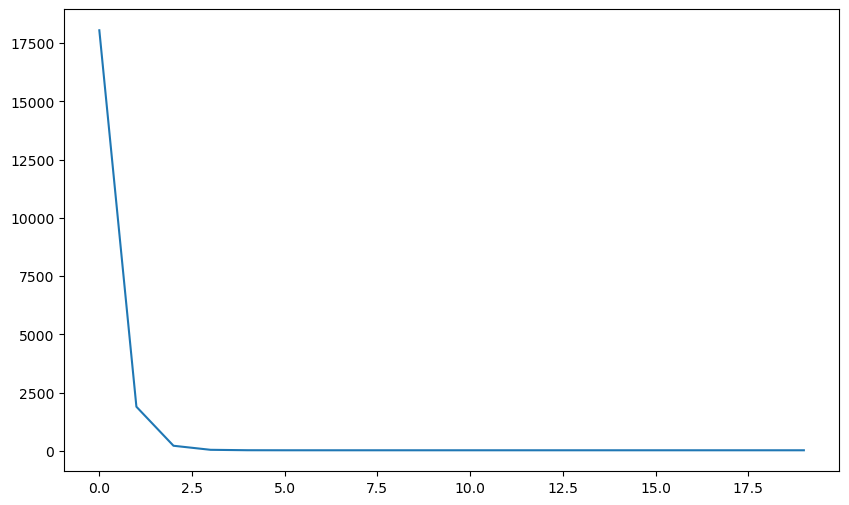

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(costs)
plt.show()

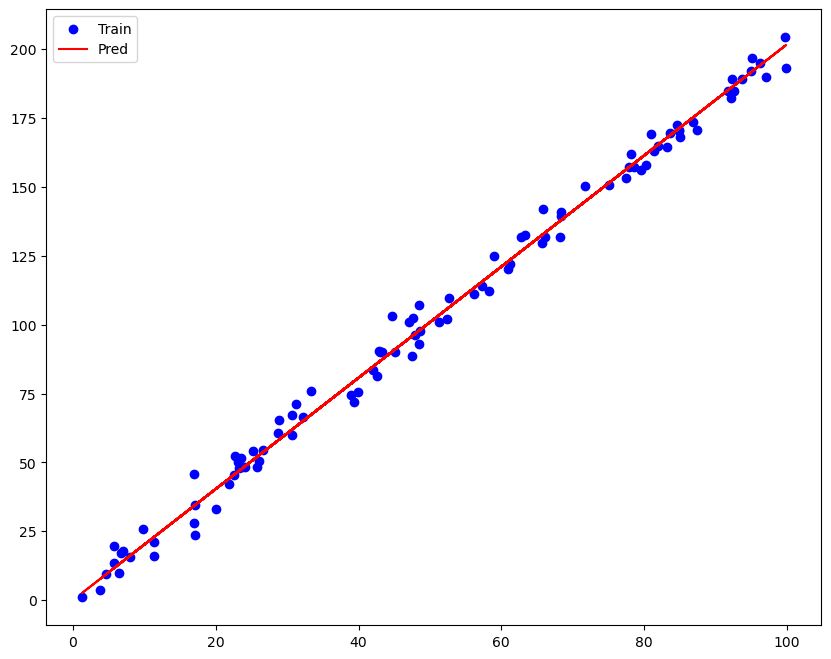

In [24]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, color='blue', label='Train')
plt.plot(X, preds[10], color='red', label='Pred')
plt.legend()
plt.show()

In [25]:
params

array([0.03666512, 2.01642897])

## Метод стохастического градиентного спуска

In [26]:
EPOCHS = 100
LEARNING_RATE = 0.0001

costs = []
params = []
preds = []
np.random.seed(9)
params = np.random.normal(size=(2,))
print(params)
list_params_sgd = [params.copy()]

for _ in range(EPOCHS):
    predictions = params[0] + params[1] * X
    preds.append(predictions)
    
    cost = np.sum((predictions - Y) ** 2) / len(predictions)
    costs.append(cost)
    
    i = np.random.choice(len(X))
    current_prediction = params[0] + params[1] * X[i]

    params[0] -= LEARNING_RATE * np.sum(current_prediction - Y[i]) * 2
    params[1] -= LEARNING_RATE * np.sum((current_prediction - Y[i]) * X[i]) * 2

    list_params_sgd.append(params.copy())

[ 0.00110855 -0.28954407]


In [27]:
costs[-1]

21.4633584207844

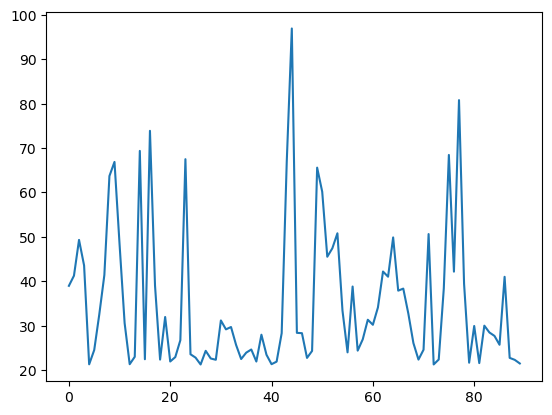

In [28]:
plt.plot(costs[10:])
plt.show()

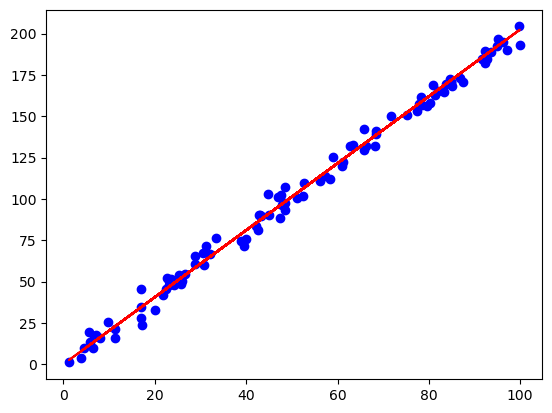

In [29]:
plt.scatter(X, Y, color='blue')
plt.plot(X, preds[-1], color='red')
plt.show()

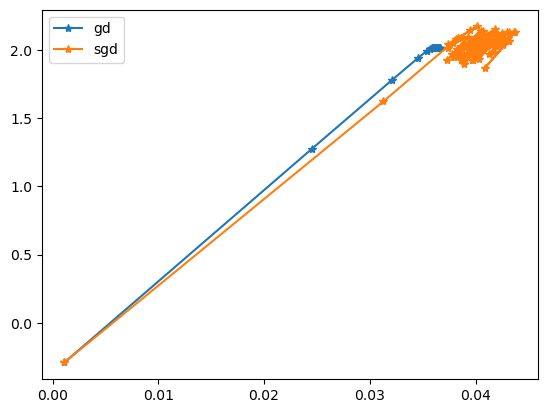

In [30]:
list_params_sgd = np.array(list_params_sgd)
list_params_gd = np.array(list_params_gd)

plt.plot(list_params_gd[:, 0], list_params_gd[:, 1], marker='*', label='gd')
plt.plot(list_params_sgd[:, 0], list_params_sgd[:, 1], marker='*', label='sgd')
plt.legend()
plt.show()

## **Дополнительные материалы**
1. Методы оптимизации нейронных сетей https://habr.com/ru/post/318970/
2. Реализация линейной регрессии https://www.youtube.com/watch?v=KJA9A1q9l7E
3. Реализация логистической регрессии https://youtu.be/ruVK07YF-RU
4. Метод сопряжённых градиентов (Newton conjugate gradient method) http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%81%D0%BE%D0%BF%D1%80%D1%8F%D0%B6%D1%91%D0%BD%D0%BD%D1%8B%D1%85_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2


In [31]:
import numpy as np


class LogReg:

    def __init__(self, EPOCHS, LEARNING_RATE, X, y):
        self.theta0, self.theta1 = np.random.normal(size=(2,))
        self.EPOCHS = EPOCHS
        self.LEARNING_RATE = LEARNING_RATE
        self.X = X
        self.y = y
        self.predictions = []

    def _cost_function(self):
        """
        Summary
            The _cost_function method calculates the cost function for a linear regression model. It measures the
            average squared difference between the predicted values and the actual values.

        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the _cost_function method
            cost = model._cost_function()

            print(cost)

            Output:
            0.0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.
            theta0: The intercept parameter of the linear regression model.
            theta1: The slope parameter of the linear regression model.
            X: The input features.
            y: The target values.

        Flow
            Initialize the total_cost variable to 0.
            Iterate over each element in the input features X.
            Calculate the predicted value predict using the linear regression equation: predict = theta0 + theta1 * X[i].
            Calculate the squared difference between the predicted value and the corresponding target value:
            (predict - y[i]) ** 2.
            Add the squared difference to the total_cost.
            Return the average cost by dividing the total_cost by the number of input features len(X).

        Outputs
            total_cost / len(X): The average cost, which represents the average squared difference between the predicted
            values and the actual values.
        """
        for _ in range(self.EPOCHS):
            total_cost_list = []
            total_cost = 0
            for i in range(len(self.X)):
                predict = self.theta0 + self.theta1 * self.X[i]
                total_cost += (predict - self.y[i]) ** 2
                total_cost_list.append(total_cost)
            self.predictions.append(total_cost_list)
        return total_cost / len(self.X)

    def get_predictions(self):
        """Summary
            The get_predictions method is a part of the LogReg class and returns the list of predictions made by the linear regression model.
        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the get_predictions method
            predictions = model.get_predictions()

            print(predictions)

            Output:
            [0, 0, 0]
        Code Analysis
        Inputs
            None

        Flow
            The get_predictions method returns the list of predictions made by the linear regression model. This list is stored in the predictions attribute of the LogReg class. The method simply returns this attribute.

        Outputs
            predictions: The list of predictions made by the linear regression model.
        """
        return self.predictions


class GD(LogReg):

    def _der_theta0(self):
        """
        Summary
            The _der_theta0 method calculates the derivative of the cost function with respect to the intercept
            parameter (theta0) in a linear regression model.

        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the _der_theta0 method
            derivative = model._der_theta0()

            print(derivative)

            Output:
            0.0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.
            theta0: The intercept parameter of the linear regression model.
            theta1: The slope parameter of the linear regression model.
            X: The input features.
            y: The target values.

        Flow
            Initialize the total_cost variable to 0.
            Iterate over each element in the input features X.
            Calculate the predicted value predict using the linear regression equation: predict = theta0 + theta1 * X[i].
            Calculate the derivative of the cost function with respect to theta0 as 2 * (predict - y[i]).
            Add the derivative to the total_cost.
            Return the average derivative by dividing the total_cost by the number of input features len(X).

        Outputs
            total_cost / len(X): The average derivative, which represents the derivative of the cost function with
            respect to the intercept parameter (theta0) in the linear regression model.
        """
        total_cost = 0
        for i in range(len(self.X)):
            predict = self.theta0 + self.theta1 * self.X[i]
            total_cost += 2 * (predict - self.y[i])
        return total_cost / len(self.X)

    def _der_theta1(self):
        """
        Summary
            The _der_theta1 method calculates the derivative of the cost function with respect to the slope parameter (theta1) in a linear regression model.

        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the _der_theta1 method
            derivative = model._der_theta1()

            print(derivative)

            Output:
            0.0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.
            theta0: The intercept parameter of the linear regression model.
            theta1: The slope parameter of the linear regression model.
            X: The input features.
            y: The target values.

        Flow
            Initialize the total_cost variable to 0.
            Iterate over each element in the input features X.
            Calculate the predicted value predict using the linear regression equation: predict = theta0 + theta1 * X[i].
            Calculate the derivative of the cost function with respect to theta1 as 2 * (predict - y[i]) * X[i].
            Add the derivative to the total_cost.
            Return the average derivative by dividing the total_cost by the number of input features len(X).

        Outputs
            total_cost / len(X): The average derivative, which represents the derivative of the cost function with respect to the slope parameter (theta1) in the linear regression model.
        """
        total_cost = 0
        for i in range(len(self.X)):
            predict = self.theta0 + self.theta1 * self.X[i]
            total_cost += 2 * (predict - self.y[i]) * self.X[i]
        return total_cost / (len(self.X))

    def fit(self):
        """
        Summary
            The fit method in the LogReg class is used to train the linear regression model by updating the values of
            the intercept parameter (theta0) and the slope parameter (theta1) over a specified number of epochs.
        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the fit method to train the model
            model.fit()

            # Get the updated values of theta0 and theta1
            theta0, theta1 = model.get_cofs()

            print(theta0, theta1)

            Output:
            0.0, 2.0
        Code Analysis
        Inputs
            self: The instance of the LogReg class.
            EPOCHS: The number of training iterations.
            LEARNING_RATE: The learning rate, which determines the step size for updating the parameters.
            X: The input features.
            y: The target values.

        Flow
            Iterate over the specified number of epochs.
            Calculate the derivative of the cost function with respect to theta0 using the _der_theta0 method.
            Calculate the derivative of the cost function with respect to theta1 using the _der_theta1 method.
            Update the value of theta0 by subtracting the product of the learning rate and the derivative of theta0 from
            the current value of theta0.
            Update the value of theta1 by subtracting the product of the learning rate and the derivative of theta1 from
            the current value of theta1.

        Outputs
            None. The method updates the values of theta0 and theta1 in the LogReg instance.
        """
        for _ in range(self.EPOCHS):

            self.theta0 = self.theta0 - self.LEARNING_RATE * self._der_theta0()
            self.theta1 -= self.LEARNING_RATE * self._der_theta1()

    def get_coefs(self):
        """
        Summary
            The get_cofs method in the LogReg class returns the values of the intercept parameter (theta0) and the slope
            parameter (theta1) of a linear regression model.

        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the get_cofs method
            theta0, theta1 = model.get_cofs()

            print(theta0, theta1)

            Output:
            0, 0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.

        Flow
            The get_cofs method simply returns the values of the theta0 and theta1 attributes of the LogReg instance.

        Outputs
            theta0: The value of the intercept parameter (theta0) in the linear regression model.
            theta1: The value of the slope parameter (theta1) in the linear regression model.
        """
        return self.theta0, self.theta1

    def get_theta0(self):
        """
        Summary
            The get_theta0 method in the LogReg class returns the value of the intercept parameter (theta0) in a linear regression model.

        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the get_theta0 method
            theta0 = model.get_theta0()

            print(theta0)

            Output:
            0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.

        Flow
            The get_theta0 method simply returns the value of the theta0 attribute of the LogReg instance.

        Outputs
            theta0: The value of the intercept parameter (theta0) in the linear regression model.
        """
        return self.theta0

    def get_theta1(self):
        """
        Summary
            The get_theta1 method in the LogReg class returns the value of the slope parameter (theta1) in a linear regression model.

        Example Usage
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])
            theta1 = model.get_theta1()

            print(theta1)

            Output:
            0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.

        Flow
            The get_theta1 method simply returns the value of the theta1 attribute of the LogReg instance.

        Outputs
            theta1: The value of the slope parameter (theta1) in the linear regression model.
        """
        return self.theta1

    def get_cost(self):
        """
        Summary
            The get_cost method in the LogReg class returns the cost function value for a linear regression model. The cost function measures the average squared difference between the predicted values and the actual values.

        Example Usage
            # Create an instance of the LogReg class
            model = LogReg(theta0=0, theta1=0, EPOCHS=100, LEARNING_RATE=0.01, X=[1, 2, 3], y=[2, 4, 6])

            # Call the get_cost method
            cost = model.get_cost()

            print(cost)

            Output:
            0.0

        Code Analysis
        Inputs
            self: The instance of the LogReg class.

        Flow
            The get_cost method calls the _cost_function method to calculate the cost function value.
            The _cost_function method iterates over each element in the input features X.
            For each element, it calculates the predicted value predict using the linear regression equation: predict = theta0 + theta1 * X[i].
            It calculates the squared difference between the predicted value and the corresponding target value: (predict - y[i]) ** 2.
            It adds the squared difference to the total_cost.
            Finally, it returns the average cost by dividing the total_cost by the number of input features len(X).

        Outputs
            total_cost / len(X): The average cost, which represents the average squared difference between the predicted values and the actual values.
        """
        return self._cost_function()


class SGD(LogReg):
    pass
